#### Technique pour la selection des variables

**1ere approche** : methode manuelle
- Selection basée sur la connaissance métier
- Selection des données qui sont bien renseignées (moins de 30% de valeurs manquantes)


**2eme approche** : methode par filtrage (filter methods)
- Filtrer les variables selon le critere statistique, utiliser les test statistiques pour etudier la correlation entre la var d'interet et les autres variables ( Technique de sélection : Corré de Pearson, de Spearman, Tau de Kendall, Student, ANOVA, Wilcoxon, Kruskal  Wallis, Student,Anova, Khi-deux, V-Cramer, Tschuprow, Information value (IV) et utiliser ensuite la methode du coude qui ve permettre de choisir les k variables qui vont etre utiliser pour le modele.
- l'inconvenient: une variable peut ne pas etre pertinente sur le plan univarié et l'etre sur le plan multivarié

**3eme approche** : methode d'emballage(wrapper methods)
Va faire des sous-ensembles de modeles à partir de variables, entrainer ces models et choisir le plus performant (methode de selection automatique)
En terme de methodes de selection automatique, on a :
- Forward selection : commence sans variables et ajoute progressivement les variables les plus performantes, Avantages : simple à mettre en oeuvre, Inconvenients : Peut inclure des variables non pertinentes, ne revient pas en arriere pour eliminer les variables ajoutés precedemmment
- Backward selection : commence avec toutes les variables et elimine progressivement les variables les moins performantes, Avantages : Elimine les variables non pertinentes, Inconvenients : Ne prend pas en compte les variables éliminées précedemment qui pourraient etre utiles en combinaison avec d'autres variables
- StepWise selection : Combine les approches Forward et Backward pour selectionner les variables, Avantages: Prend en compte les interactions entre les variables plus robuste que , Inconvenients: Couteux en temps et en ressource, risque de surapprentissage 

**4eme approche** : Methode intégrées (Embedded methods)
le modele selectionne lui meme ces propres variables . On a deux approche : 
- On a les methodes de regularisation: LASSO( met les cefficients à 0 pour toutes valeurs qui ne sont pas significatives, RIGDE : ne selectionne pas les variables mais penalise toutes les variables qui ont un coefficient élevés, Elastic Net : combine les deux precedentes approches.
- Les forets aleatoires: On met en place les forets aleatoires, cela nous donne les variables les plus importante, on les selectionne ensuite et les met dans le modele

**5emme approche** : Mthode factorielle (Dimensionality reduction) : Inconvenients : on ne pourrait plus expliqué le modele final


####  1 Importation des packages et chargement des données:

In [8]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectKBest, f_classif # tres interessant lorsqu'on veut selectionner les données
import matplotlib.pyplot as plt

In [10]:
# Charger la base de données Breast Cancer
data = load_breast_cancer()
x, y = data.data, data.target # x: ce sont les valeurs de valeurs explicatives et  y la variable à expliquer (qui est binaire d'ailleurs)
columns = data.feature_names

In [12]:
columns

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [14]:
x

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [16]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

### Selection des variables basée sur la variance

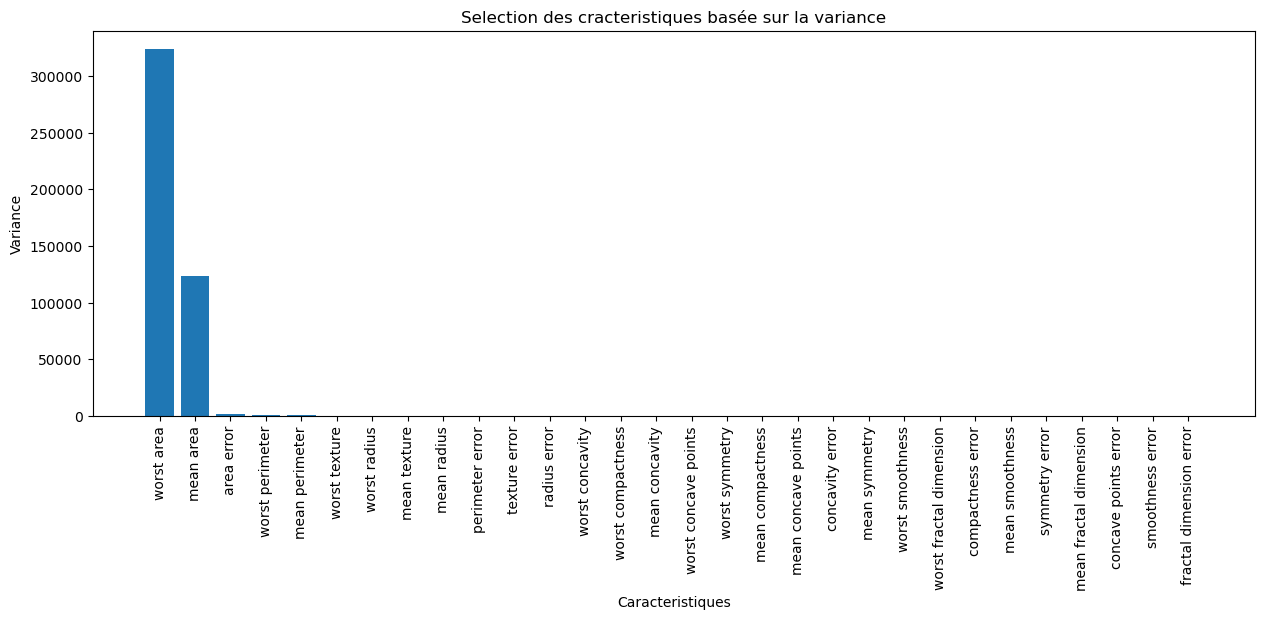

In [20]:
# En ML, il faut s'assurer les variables ont une bonne variance. parceque'sil y'a pas de variabiité, ca suppose que la variable ne discrimine
# pas bien le phenomene que l'on cherche à etudier. Si la variance de la variable est nulle ==> que cette variable n'est pas explicative 

# Calculer la variance pour chaque caracteristique
variances = np.var(x, axis=0)
sorted_indices = np.argsort(variances)[::-1]

# Afficher la courbe des variances
plt.figure(figsize=(15, 5))
plt.bar(x=columns[sorted_indices], height=variances[sorted_indices])
plt.xticks(rotation=90)
plt.xlabel('Caracteristiques')
plt.ylabel('Variance')
plt.title('Selection des cracteristiques basée sur la variance')
plt.show()

In [ ]:
# On peut voir les variables qui ont une grande variance, ce sont les deux premieres

In [22]:
from sklearn.feature_selection import VarianceThreshold # permet de selectionner toutes les variables qui n'ont pas la variance du seuil choisi
# Appliquer le seuil de variance
threshold = 0.8 * (1 - 0.8) # Exemple de seuil, adapter selon les besoins, plus c'est bas mieux c'est. Si une variable n'a pas une grande variance, 
# on ne l'introduit pas notre modele.

selector = VarianceThreshold(threshold=threshold)
x_high_variance = selector.fit_transform(x)

# Afficher les caracteristiques sélectionnées
select_columns = columns[selector.get_support()]
print(f"Caracteristiques sélectionnées : {select_columns}")

Caracteristiques sélectionnées : ['mean radius' 'mean texture' 'mean perimeter' 'mean area' 'texture error'
 'perimeter error' 'area error' 'worst radius' 'worst texture'
 'worst perimeter' 'worst area']


me genere des variables qui sont superieurs au seuil que j'ai defini (A retenir, on choisit les variables qui ont une bonne variabilité)

#### 2 Approche basé sur l'ANOVA
rappel: y est qualitative binaire et x est quantitative

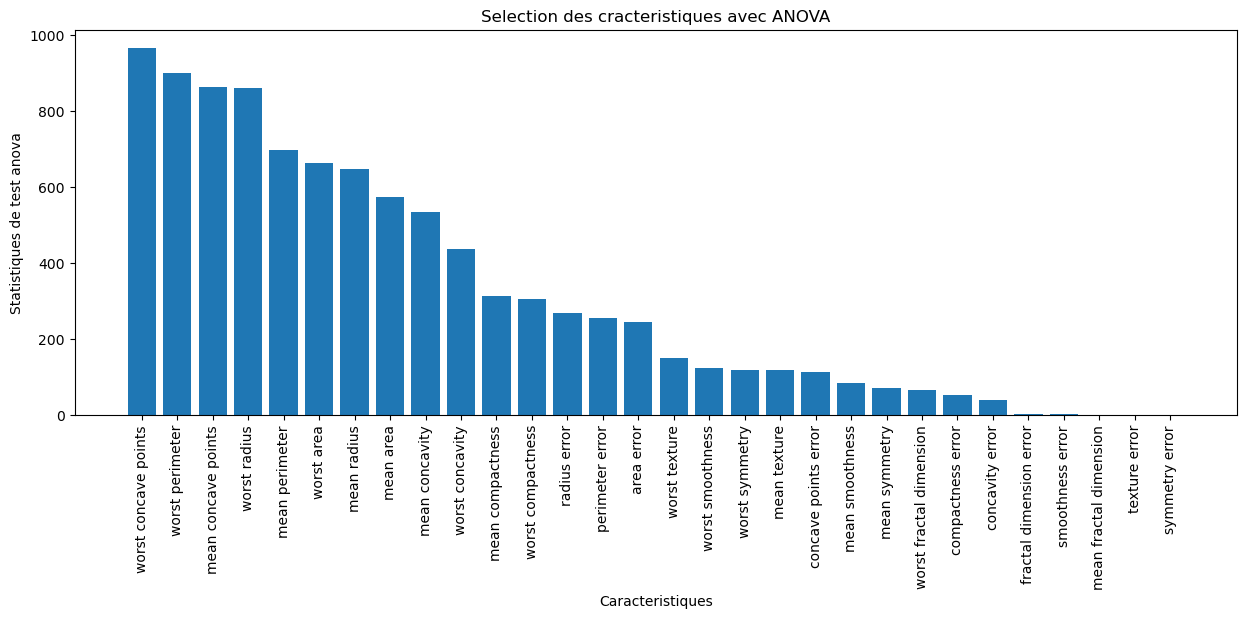

In [27]:
# Charger la base de données breast_cancer
data = load_breast_cancer()
x = data.data
y = data.target

# Appliquer la fonction SelectKBest avec ANOVA pour selectionner les k meilleurs caracteristiques
selector = SelectKBest(score_func=f_classif, k='all')
x_new = selector.fit_transform(x, y)
anova_scores = selector.scores_
sorted_indices = np.argsort(anova_scores)[::-1]
# [::-1] : np.argsort() est une fonction de NumPy qui renvoie les indices qui triendraient un tableau donné en ordre croissant.
# Cette notation effectue une inversion de l'ordre des indices obtenus.Elle permet donc de trier les indices en ordre 
# décroissant au lieu de croissant.

# Afficher la courbe des scores ANOVA

plt.figure(figsize=(15, 5))
plt.bar(x=data.feature_names[sorted_indices], height=anova_scores[sorted_indices])
plt.xticks(rotation=90)
plt.xlabel('Caracteristiques')
plt.ylabel('Statistiques de test anova')
plt.title('Selection des cracteristiques avec ANOVA')
plt.show()


Pour faire mon model on peut choisir les 10 premieres variables, le coude se formant entre la 10eme et 11 eme variable

In [34]:
# Selectionner les meilleurs caracteristiques avec SelectKBest et ANOVA
best_features = SelectKBest(score_func=f_classif, k=10)
x_new = best_features.fit_transform(x, y)
selected_features = data.feature_names[best_features.get_support()]

print('Les meilleurs caracteristiques sont :', selected_features)

Les meilleurs caracteristiques sont : ['mean radius' 'mean perimeter' 'mean area' 'mean concavity'
 'mean concave points' 'worst radius' 'worst perimeter' 'worst area'
 'worst concavity' 'worst concave points']


**Nous avons ici les 10 valeurs qui expliquent le mieux la variable y suivant le test ANOVA** 
**Et pour faire un test ANOVA, il faut respecter deux criteres:**
- **Il faut que la distribution des variables explicatives soient normales**
- **et l'hypothese d'egalité des variances qu'il faudrait faire avec le test de Levenne**


In [51]:
from scipy.stats import shapiro, levene
# Calculer la normalité et l'egalité des variances pour chaque variable
normality_p_values = []
normality = []
equality_variances = []
for i, column in enumerate(data.feature_names): # enumerate(data.feature_names) permet de parcourir cette liste tout en obtenant à la fois 
    # l'index (i) et la valeur (column) de chaque élément.
    w, p_w = shapiro(x[:,i]) # Le test de shapiro pour la normalité
    levenne_stat, levene_p = levene(x[:,i][y==0], x[:,i][y==1], center='mean')
    normality.append(p_w > 0.05)
    equality_variances.append(levene_p > 0.05)

# Appliquer la fonction SelectKBest avec ANOVA pour selectionner les k meilleurs caracteristiques
selector = SelectKBest(score_func=f_classif, k='all')
x_new = selector.fit_transform(x,y)
anova_scores = selector.scores_
sorted_indices = np.argsort(anova_scores)[::-1]

# Afficher les resultats sous forme de tableau
table = pd.DataFrame({'Caracteristique': data.feature_names[sorted_indices], 
                      'score ANOVA': anova_scores[sorted_indices],
                     'Normalité': np.array(normality)[sorted_indices],
                      'Égalité des variances': np.array(equality_variances)[sorted_indices]})
print(table)


            Caracteristique  score ANOVA  Normalité  Égalité des variances
0      worst concave points   964.385393      False                  False
1           worst perimeter   897.944219      False                  False
2       mean concave points   861.676020      False                  False
3              worst radius   860.781707      False                  False
4            mean perimeter   697.235272      False                  False
5                worst area   661.600206      False                  False
6               mean radius   646.981021      False                  False
7                 mean area   573.060747      False                  False
8            mean concavity   533.793126      False                  False
9           worst concavity   436.691939      False                  False
10         mean compactness   313.233079      False                  False
11        worst compactness   304.341063      False                  False
12             radius err

Dans la sortie, pour la plupart des cas, le critere de normalité et d'egalité des variances n'est pas respecté. Au lieu de mettre un test basé sur l'ANOVA, il faut mettre en place un test non parametrique

### 3 Selection des variables en se basant sur le test de Kruskall wallis

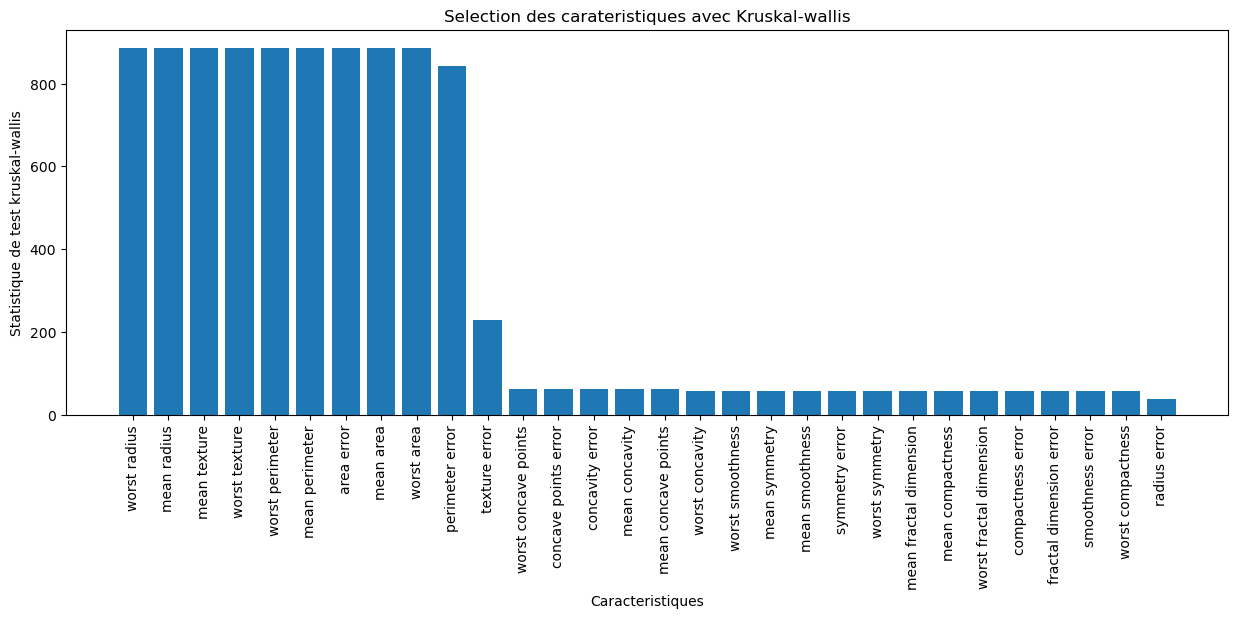

In [63]:
from scipy.stats import kruskal
# Appliquer la fonction SelectKBest  avec Kruskal-wallis  pour selectionner les k meilleurs caracteristiques
selector = SelectKBest(score_func=lambda x, y: np.apply_along_axis(lambda x: kruskal(x, y).statistic, 0, x), k='all') 
# SelectKBest sélectionne les k meilleures caractéristiques en fonction d'une fonction de score.
x_new = selector.fit_transform(x, y)
kruskal_scores = selector.scores_
sorted_indices = np.argsort(kruskal_scores)[::-1]

# Afficher la courbe des scores Kruskal_wallis
plt.figure(figsize=(15, 5))
plt.bar(x=data.feature_names[sorted_indices], height=kruskal_scores[sorted_indices])
plt.xticks(rotation=90)
plt.xlabel('Caracteristiques')
plt.ylabel('Statistique de test kruskal-wallis')
plt.title('Selection des carateristiques avec Kruskal-wallis')
plt.show()

In [61]:
# En se basant sur le kruskal, les 10 premieres valeurs sont les plus explicatives

# Selectionner les meilleurs caracterisques avec SelectKBest et Kruskal_Wallis
best_features = SelectKBest(score_func=lambda x, y: np.apply_along_axis(lambda x: kruskal(x, y).statistic, 0, x), k=10) # si l'on veut tout k='all'
x_new = best_features.fit_transform(x,y)
selected_features = data.feature_names[best_features.get_support()]

print('Les meilleurs caractéristiques sont :', selected_features)

Les meilleurs caractéristiques sont : ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'perimeter error' 'area error' 'worst radius' 'worst texture'
 'worst perimeter' 'worst area']


In [87]:
# Une fois que c'est fait, on a plus qu'à utiliser les best_features pour notre modele de regression logistique

from sklearn.linear_model import LogisticRegression
# LogisticRegression → Pour entraîner un modèle de régression logistique.
from sklearn.model_selection import train_test_split
# train_test_split → Pour diviser les données en un jeu d'entraînement et un jeu de test.
from sklearn.metrics import accuracy_score
# accuracy_score → Pour évaluer la performance du modèle en calculant l'exactitude (accuracy).

x, y =data.data, data.target
columns = data.feature_names # Liste des noms des caractéristiques (colonnes de X).

# Selectionner les meilleurs caracteristiques avec SelectKBest et Kruskal-wallis
best_features = SelectKBest(score_func=lambda x, y: np.apply_along_axis(lambda x: kruskal(x,y).statistic, 0, x), k=10)

# SelectKBest → Sélectionne les k meilleures caractéristiques selon une métrique donnée.
# score_func= → La fonction d'évaluation ici est Kruskal-Wallis, un test non paramétrique pour comparer des distributions.
# np.apply_along_axis(...) → Applique Kruskal-Wallis sur chaque colonne (axis=0).
# k=10 → On sélectionne les 10 meilleures caractéristiques.

x_new = best_features.fit_transform(x, y)
# fit_transform(x, y) → Applique SelectKBest pour garder uniquement les 10 meilleures variables.
selected_features = columns[best_features.get_support()]
# get_support() → Retourne un masque booléen indiquant quelles colonnes ont été sélectionnées.
# selected_features → Liste des noms des variables sélectionnées.

# Diviser le jeu de données en ensemble d'entrainement et de test
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.3, random_state=0)
# train_test_split() → Sépare les données en 70% entraînement et 30% test (test_size=0.3).
# random_state=0 → Assure que la division est répétable.

# Entrainer une regression logistique sur les caracteristiques selectionnées
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
# logreg = LogisticRegression() → Crée un modèle de régression logistique.
# fit(x_train, y_train) → Entraîne le modèle sur les données d'entraînement.

# Faire des predictions sur l'ensemble de test
y_pred = logreg.predict(x_test)
# predict(x_test) → Utilise le modèle entraîné pour prédire les classes sur les données de test.

# Calculer la precision du modele
accuracy = accuracy_score(y_test, y_pred) # Calcule la précision (accuracy), c'est-à-dire le taux de bonnes prédictions.
print('Precision: {:2f}'.format(accuracy))

Precision: 0.947368


C:\Users\brech\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Pour lister les methodes et les attributs associées à une classe ou consulter la documentation python**

In [95]:
# print(dir(LogisticRegression()))
# help(LogisticRegression())  # Documentation sur la fonction print
# help(str.upper)  # Documentation sur la méthode upper() des chaînes de caractères
# help(sklearn.linear_model.LogisticRegression.fit)  # Documentation sur fit() de LogisticRegression
# print(np.mean.__doc__)  # Documentation de la fonction mean de NumPy

import sklearn.linear_model
# print(sklearn.linear_model.__doc__)
help(sklearn.linear_model.LogisticRegression)  # Documentation complète de la classe LogisticRegression

#### Autre approche pour le test de kruskall_wallis

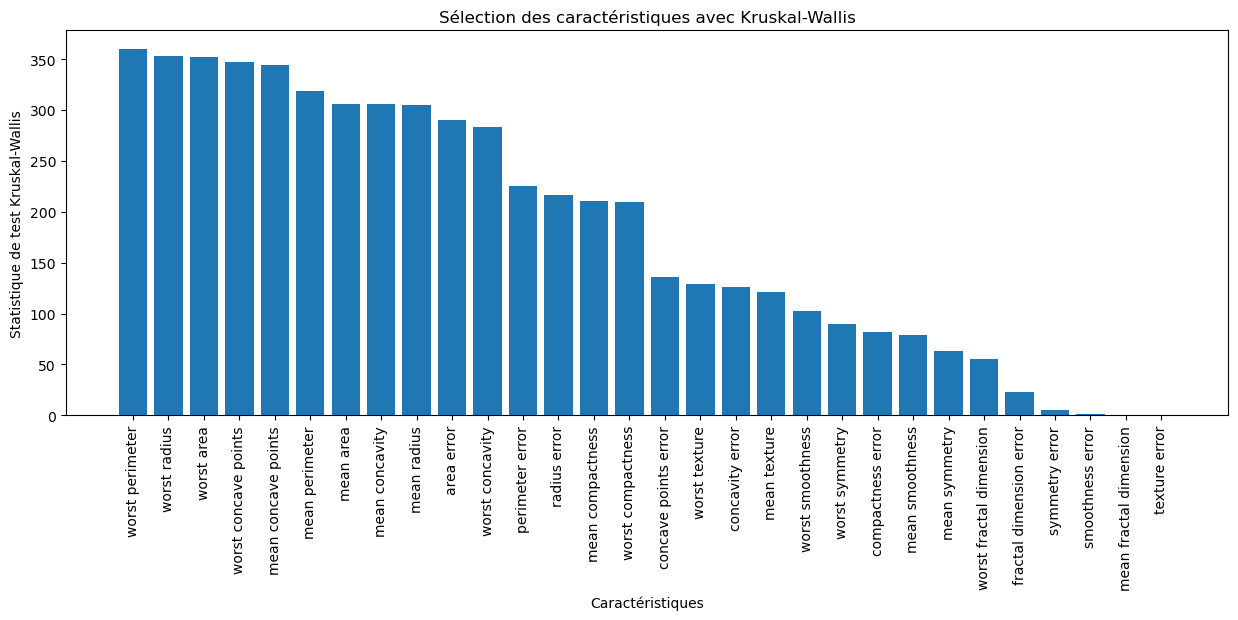

Les meilleures caractéristiques sont : ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'perimeter error' 'area error' 'worst radius' 'worst texture'
 'worst perimeter' 'worst area']


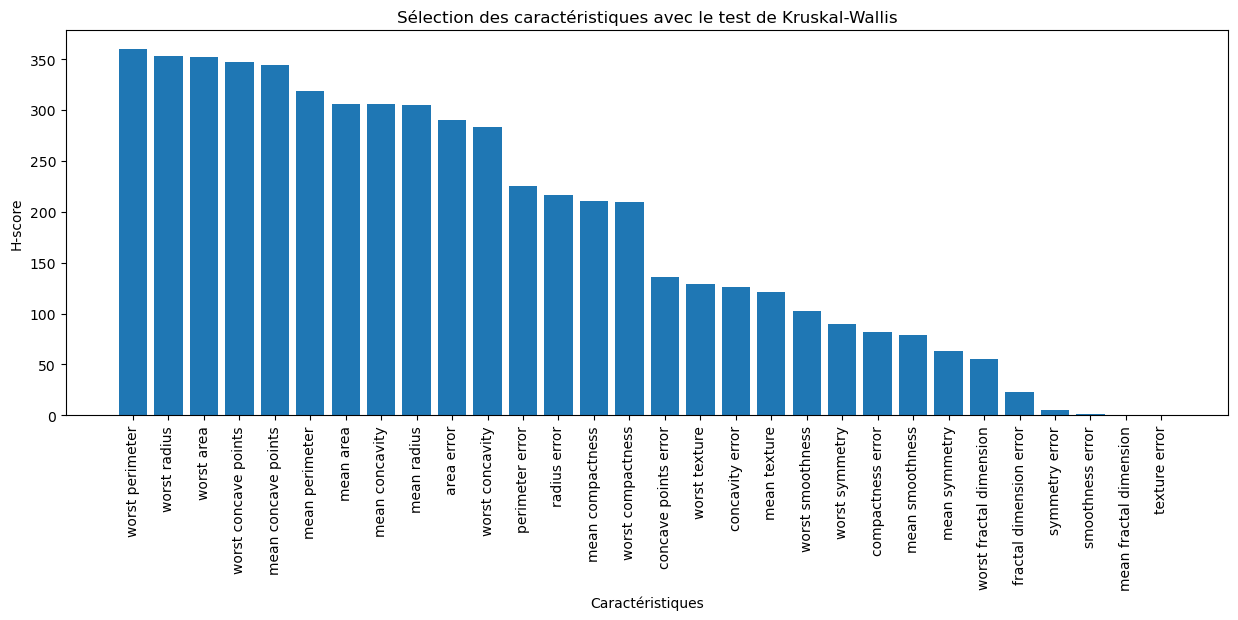

In [209]:
from scipy.stats import kruskal
# Séparer les données en deux groupes en fonction de la variable cible
group0 = x[y == 0] # sélectionne uniquement les lignes de x où y == 0.
group1 = x[y == 1] # sélectionne uniquement les lignes de x où y == 1
# x = data.data : récupère les caractéristiques (features) sous forme de tableau numpy.
# y = data.target : récupère les étiquettes de classe (0 ou 1), qui indiquent si une tumeur est maligne ou bénigne.

# 🔥 Différence principale
# La première méthode (group0/group1) filtre les données en fonction de la classe cible y.
# La deuxième méthode (x, y) charge simplement l'ensemble de données mais ne fait pas encore de séparation selon la classe.

# Appliquer la fonction SelectKBest avec Kruskal-Wallis pour sélectionner les k meilleures caractéristiques
selector = SelectKBest(score_func=lambda x, y: np.array([kruskal(group0[:, i], group1[:, i]).statistic for i in range(x.shape[1])]), k='all')
x_new = selector.fit_transform(x, y)
kruskal_scores = selector.scores_
sorted_indices = np.argsort(kruskal_scores)[::-1]

# Afficher la courbe des scores Kruskal-Wallis
plt.figure(figsize=(15, 5))
plt.bar(x=data.feature_names[sorted_indices], height=kruskal_scores[sorted_indices])
plt.xticks(rotation=90)
plt.xlabel('Caractéristiques')
plt.ylabel('Statistique de test Kruskal-Wallis')
plt.title('Sélection des caractéristiques avec Kruskal-Wallis')
plt.show()

#####################################################################################################################################

# Sélectionner les meilleures caractéristiques avec SelectKBest et Kruskal-Wallis
best_features = SelectKBest(score_func=lambda x, y: np.apply_along_axis(lambda x: kruskal(x, y).statistic, 0, x), k=10)
X_new = best_features.fit_transform(x, y)
selected_features = data.feature_names[best_features.get_support()]

print('Les meilleures caractéristiques sont :', selected_features)

#####################################################################################################################################

from scipy.stats import kruskal
# Séparer les données en deux groupes en fonction de la variable cible
group0 = x[y == 0]
group1 = x[y == 1]

# Calculer les scores H pour chaque caractéristique avec le test de Kruskal-Wallis
h_scores = np.array([kruskal(group0[:, i], group1[:, i])[0] for i in range(x.shape[1])])
sorted_indices = np.argsort(h_scores)[::-1]

# Afficher la courbe des scores H
plt.figure(figsize=(15, 5))
plt.bar(x=columns[sorted_indices], height=h_scores[sorted_indices])
plt.xticks(rotation=90)
plt.xlabel('Caractéristiques')
plt.ylabel("H-score")
plt.title('Sélection des caractéristiques avec le test de Kruskal-Wallis')
plt.show()

**Pour rappel, jusqu'ici, on avait une variable expliqué qualitative (y) et les variables explicatives quantitatives(x)**

**Qu'en est il si toutes les variables sont qualitatives. Pour les variables qualitatives, il faut mettre en place un test de khi2**

### 4 Selection des variables qualitatives en se basant sur le khi2

In [111]:
from sklearn.preprocessing import KBinsDiscretizer
# Charger les données
data = load_breast_cancer(as_frame=True).frame # .frame : Donne un DataFrame avec les features + la variable cible (autre attribut:data.data, data.target).
# load_breast_cancer() est une fonction de Scikit-learn qui charge le jeu de données Breast Cancer Wisconsin
# as_frame=True permet de convertir les données en un DataFrame Pandas au lieu d'un simple tableau NumPy.
# .frame : Cette propriété retourne le jeu de données sous forme d'un DataFrame Pandas directement.



# Discretiser les variables numériques
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile') # c'est une discretisation par quantile qui est faite (pas recommandé)
num_cols = data.select_dtypes(include='number').columns # permet de sélectionner les colonnes numériques d'un DataFrame pandas.
# Cette méthode de Pandas filtre les colonnes du DataFrame data en ne conservant que celles de type numérique (entiers et flottants).
#'number' est un raccourci pour sélectionner les types int64, float64, etc.
# .columns : Permet d'obtenir uniquement les noms des colonnes sélectionnées sous forme d'un Index Pandas (une liste d'étiquettes de colonnes).
# Voici a quoi ressemble la sortie : Index(['age', 'taille', 'score'], dtype='object')

data[num_cols] = discretizer.fit_transform(data[num_cols])

# Transformer les colonnes en caracteres
data[num_cols] = data[num_cols].astype(str)

C:\Users\brech\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:313: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 30 are removed. Consider decreasing the number of bins.
  warnings.warn(


In [113]:
# from sklearn.preprocessing import KBinsDiscretizer
# help(KBinsDiscretizer())

#### NB : a(): c'est la classe et a : c'est l'attribut et b=a() c'est l'instanciation

C:\Users\brech\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


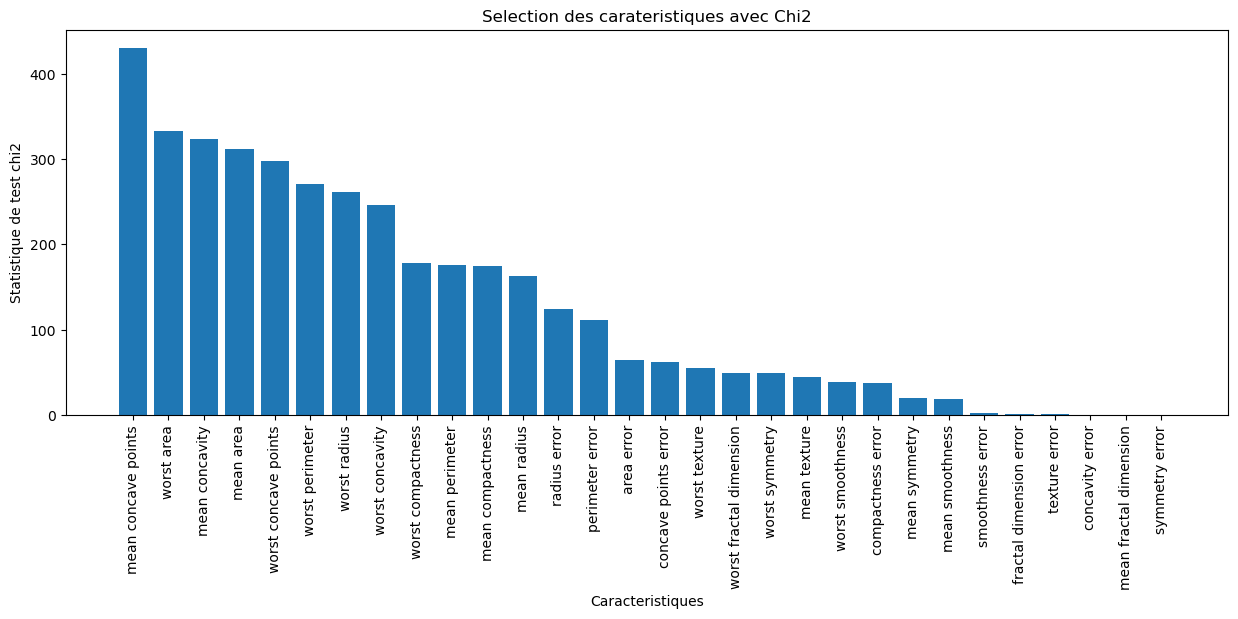

In [141]:
# Une fois que j'ai discritisé mes variables, j'applique le test de chi2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import KBinsDiscretizer

# print(dir(sklearn.datasets)): il faut l'imaginer comme une instance. et print permet de voir les elemnts qui le compose

# Charger la base de données Breast Cancer
data = load_breast_cancer()
x, y = data.data, data.target
columns = data.feature_names

# Discretiser les colonnes
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform') # Ici on appelle KBinsDiscretizer  
x_discrete = discretizer.fit_transform(x) # Ici on applique KBinsDiscretizer à partir d'une instantation

# Appliquer la fonction SelectKBest avec chi2 pour selectionner les k meilleurs caractéristiques
selector = SelectKBest(score_func=chi2, k='all') # On appelle
x_new = selector.fit_transform(x_discrete, y) # on applique
chi2_scores = selector.scores_ # ne pas oublier la barre de 8
sorted_indices = np.argsort(chi2_scores)[::-1]

# Afficher la courbe des scores chi2
plt.figure(figsize=(15,5))
plt.bar(x=columns[sorted_indices], height=chi2_scores[sorted_indices])
plt.xticks(rotation=90)
plt.xlabel('Caracteristiques')
plt.ylabel('Statistique de test chi2')
plt.title('Selection des carateristiques avec Chi2')
plt.show()

Rappel: Le Chi2 nous dit juste qu'il existe une relation mais ne nous donne pas l'intensité de la relation, 
Il faut donc mettre en place un v de cramer pour mesurer l'intensité de la relation

### 5 Sélection basée sur le Cramer

In [148]:
import scipy.stats as ss

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y) # pd.crosstab(x, y) génère un tableau de contingence entre les variables x et y.
    chi2 = ss.chi2_contingency(confusion_matrix)[0] # applique le test du chi-deux sur la table de contingence.
    # Il renvoie plusieurs valeurs, mais seul le premier élément [0] correspond à la statistique du chi-deux.
    n = confusion_matrix.sum().sum() # n est le nombre total d'observations dans la table de contingence.
    phi2 = chi2 / n # phi2 est une version normalisée du chi-deux, 
    # Le chi-deux brut dépend de la taille de l’échantillon. Le normaliser en divisant par n permet de comparer 
    # des résultats entre différentes tailles d’échantillons
    
    r, k = confusion_matrix.shape # r et k sont les dimensions de la table de contingence
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1)) # phi2corr applique une correction pour éviter des surestimations dans les petits échantillons.
    # Si la correction est négative, on la force à zéro avec max(0, ...).
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    # rcorr et kcorr appliquent une correction supplémentaire pour éviter le biais dû aux petites tailles d’échantillons.
    # La correction ajuste légèrement r et k pour mieux refléter la distribution des données.
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

## V de Cramér est compris entre 0 et 1.
## 0	Aucune association (indépendance) 
## [0.1 - 0.2]	Faible association
## [0.2 - 0.4]	Association modérée
## [0.4 - 0.6]	Forte association
## > 0.6	Association très forte

C:\Users\brech\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


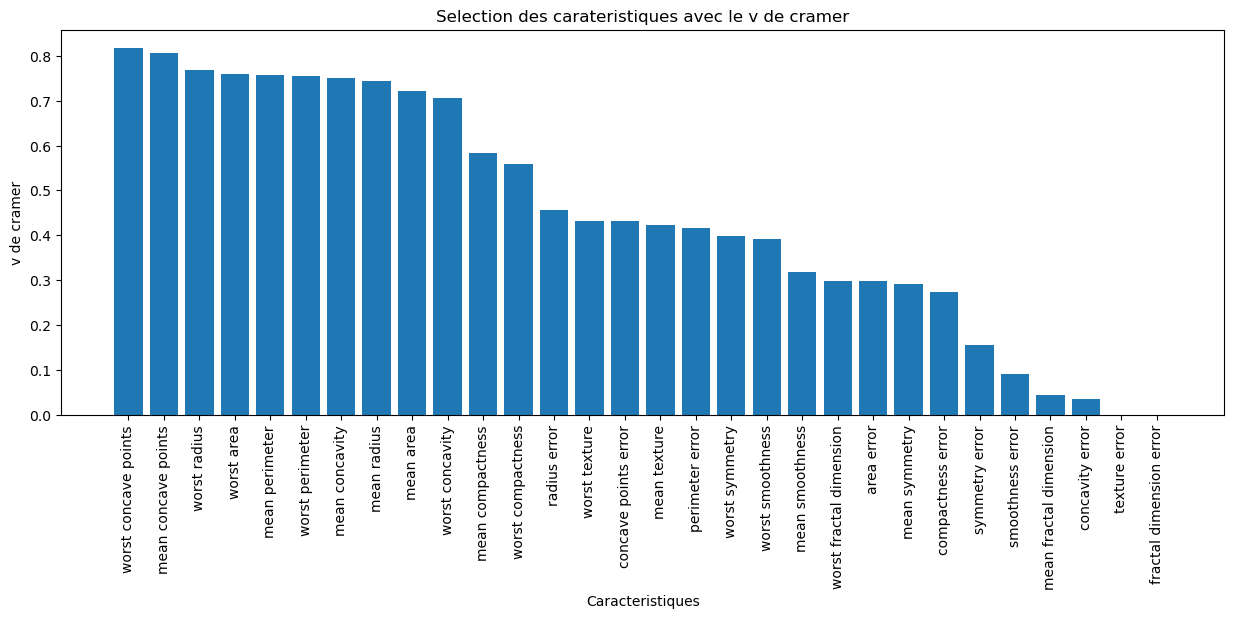

In [150]:
# Je refais ma discretisation

# Chargement de la base de données Breast Cancer
data = load_breast_cancer()
x, y = data.data, data.target
columns = data.feature_names

# Discretiser les colonnes
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')   
x_discrete = discretizer.fit_transform(x) 
# La discrétisation (On transforme en variable discrete) est un processus qui transforme une variable continue en une variable catégorielle 
# en la divisant en intervalles ou bins.
# Exemple : 

#valeurs continues       valeurs discretes: 
0.1	                         0
0.35	                     1
0.6	                         2
0.9	                         4

# On discretise pour:
# Faciliter le calcul du V de Cramér (prévu pour des variables catégorielles).
# Permet d’évaluer la relation non linéaire entre une variable continue et une variable catégorielle.
# Réduit la sensibilité aux valeurs extrêmes (outliers).
# Rend certaines méthodes de machine learning plus interprétables.



# Calculer les scores de v de Cramer pour chaque caracteristique
cramers_v_scores = np.array([cramers_v(x_discrete[:,i], y) for i in range(x_discrete.shape[1])])
sorted_indices = np.argsort(cramers_v_scores)[::-1]
# Afficher la courbe des scores chi2
plt.figure(figsize=(15,5))
plt.bar(x=columns[sorted_indices], height=cramers_v_scores[sorted_indices])
plt.xticks(rotation=90)
plt.xlabel('Caracteristiques')
plt.ylabel('v de cramer')
plt.title('Selection des carateristiques avec le v de cramer')
plt.show()


Plus le Cramer est élevé, plus l'intensité de la relation est forte

## 6 Sélection basée sur le T de Tschuprow

In [154]:
def tschuprow_t(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 =chi2 / n
    r, k = confusion_matrix.shape # r et k sont les dimensions de la table de contingence
    return np.sqrt(phi2 / (np.sqrt((k - 1) * (r - 1))))

C:\Users\brech\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


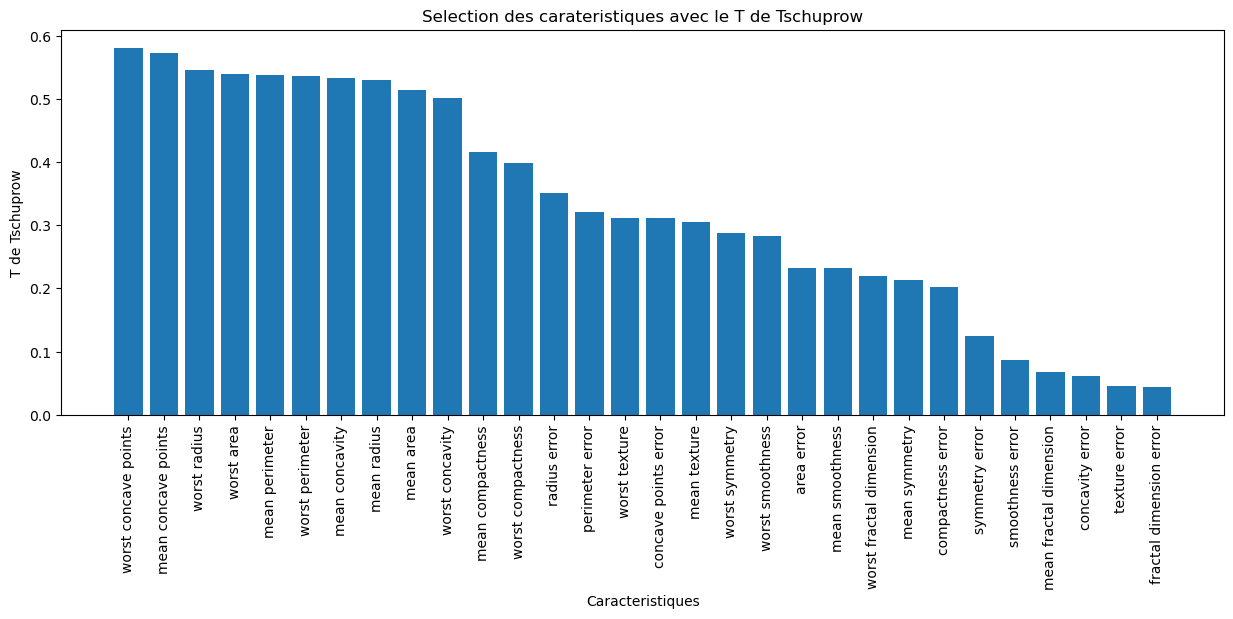

In [156]:
# Charger la base de données Breast Cancer
data = load_breast_cancer()
x, y = data.data, data.target
columns = data.feature_names

# Discretiser les colonnes
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')   
x_discrete = discretizer.fit_transform(x) 

# Calculer les scores de T de Tschuprow pour chaque caracteristique
tschuprow_t_scores = np.array([tschuprow_t(x_discrete[:, i], y) for i in range(x_discrete.shape[1])])
sorted_indices = np.argsort(tschuprow_t_scores)[::-1]

# Afficher la courbe des scores T de Tschuprow
plt.figure(figsize=(15,5))
plt.bar(x=columns[sorted_indices], height=tschuprow_t_scores[sorted_indices])
plt.xticks(rotation=90)
plt.xlabel('Caracteristiques')
plt.ylabel('T de Tschuprow')
plt.title('Selection des carateristiques avec le T de Tschuprow')
plt.show()

Le coude se forme au niveau de worst concavity 

### 7 Sélection basée sur l'information value (Nous donne la capacité predictive de notre variable categorielle, appliquer generalement sur les variables qualitatives) Method : on discretise d'abord nos variables et on l'applique
L'Information Value (IV) est une mesure utilisée pour évaluer la puissance prédictive d'une variable catégorielle dans un modèle de régression binaire. L'IV est basé sur le concept de Weight of Evidence (WOE), qui est une mesure logarithmique des proportions d'événements et de non-événements pour chaque catégorie d'une variable.

#### 7.0.1 Interprétation de l'Information Value
**L'Information Value peut être interprété comme suit :**

- IV < 0.02 : La variable a très peu de pouvoir prédictif.
- 0.02 <= IV < 0.1 : La variable a un faible pouvoir prédictif.
- 0.1 <= IV < 0.3 : La variable a un pouvoir prédictif moyen.
- 0.3 <= IV < 0.5 : La variable a un pouvoir prédictif fort.
- IV >= 0.5 : La variable a un pouvoir prédictif très fort, mais cela peut indiquer une fuite d'informations (data leakage) ou un problème avec les données.

C:\Users\brech\AppData\Local\Temp\ipykernel_12444\2281800369.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('bins')['target'].agg(['count', 'sum'])
C:\Users\brech\AppData\Local\Temp\ipykernel_12444\2281800369.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('bins')['target'].agg(['count', 'sum'])
C:\Users\brech\AppData\Local\Temp\ipykernel_12444\2281800369.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the fut

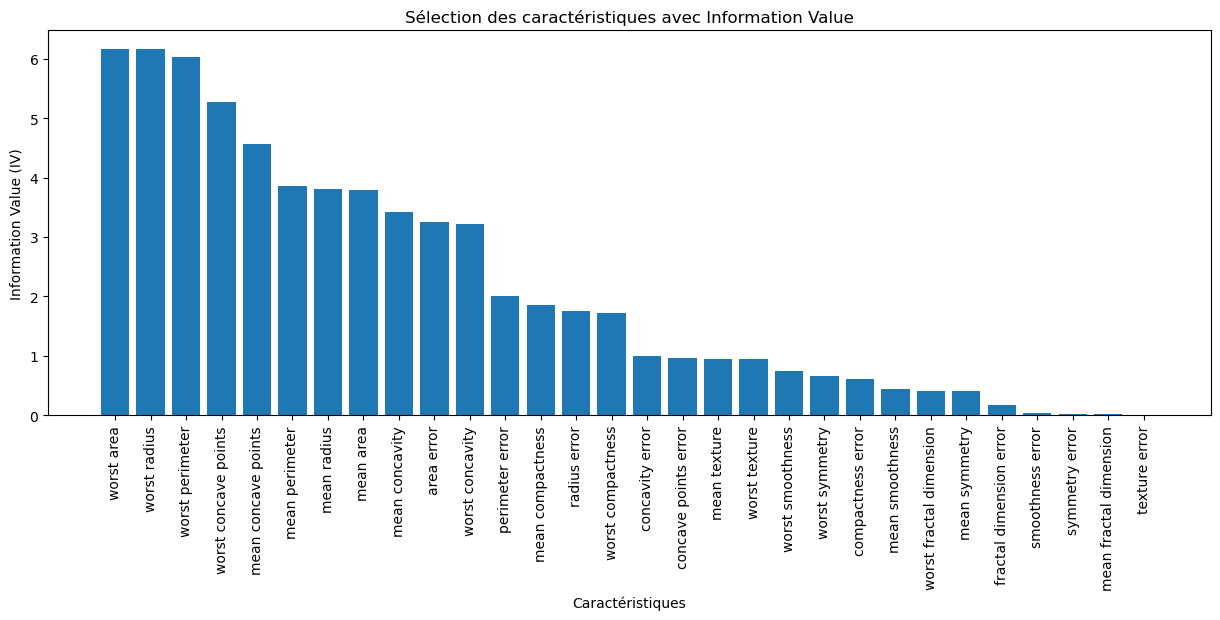

In [174]:
# Importation des bibliothèques nécessaires
import numpy as np  # Pour les calculs numériques (tableaux, opérations mathématiques)
import pandas as pd  # Pour la manipulation des données en DataFrame
import matplotlib.pyplot as plt  # Pour la visualisation des données
from sklearn.datasets import load_breast_cancer  # Pour charger le dataset Breast Cancer
from sklearn.preprocessing import KBinsDiscretizer  # Pour discrétiser les variables continues

# Charger la base de données Breast Cancer
data = load_breast_cancer()
x, y = data.data, data.target  # x contient les caractéristiques, y contient la variable cible (0 ou 1)
columns = np.array(data.feature_names)  # Transformation des noms de colonnes en array pour indexation

# Discrétisation des colonnes continues
discretizer = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile', subsample=None)  
# - `n_bins=4` : Divise chaque variable en 4 groupes (quartiles)
# - `encode='ordinal'` : Attribue un numéro à chaque groupe
# - `strategy='quantile'` : Crée des groupes avec le même nombre d'observations (équilibré)
# - `subsample=None` : Évite les avertissements pour les grandes bases de données

x_discrete = discretizer.fit_transform(x)  # Application de la transformation sur nos données

# Définition de la fonction Information Value (IV)
def information_value(x, y, epsilon=1e-6):
    """
    Calcule l'Information Value (IV) pour une caractéristique donnée.
    Plus l'IV est élevé, plus la variable est informative pour prédire y.
    """
    df = pd.DataFrame({'feature': x, 'target': y})  # Création d'un DataFrame avec la variable et la cible
    df['bins'] = pd.qcut(df['feature'], q=4, duplicates='drop')  
    # - `qcut` découpe les données en 4 groupes avec un nombre équilibré d'observations
    # - `duplicates='drop'` supprime les catégories en double si nécessaire
    
    grouped = df.groupby('bins')['target'].agg(['count', 'sum'])  
    # - On regroupe par intervalle et on calcule :
    #   - `count` : Nombre total d'observations dans chaque groupe
    #   - `sum` : Nombre d'occurrences de la classe 1 (événements)

    grouped['non_event'] = grouped['count'] - grouped['sum']  
    # - Nombre d'occurrences de la classe 0 (non-événements)

    # Distribution des événements et non-événements avec une petite valeur `epsilon` pour éviter les divisions par zéro
    grouped['event_dist'] = (grouped['sum'] + epsilon) / (grouped['sum'].sum() + epsilon)
    grouped['non_event_dist'] = (grouped['non_event'] + epsilon) / (grouped['non_event'].sum() + epsilon)

    grouped['woe'] = np.log(grouped['event_dist'] / grouped['non_event_dist'])  
    # - Calcul du **Weight of Evidence (WoE)** qui compare la proportion d'événements et de non-événements

    grouped['iv'] = (grouped['event_dist'] - grouped['non_event_dist']) * grouped['woe']  
    # - Calcul de l'Information Value (IV) qui mesure la capacité de la variable à prédire la cible

    return grouped['iv'].sum()  # Retourne la somme de l'IV sur toutes les catégories

# Calculer les scores d'Information Value pour chaque caractéristique
iv_scores = np.array([information_value(x_discrete[:, i], y) for i in range(x_discrete.shape[1])])
# - Pour chaque colonne de `x_discrete`, on calcule son IV et on stocke dans un tableau `iv_scores`

# Trier les indices des variables selon leurs scores IV en ordre décroissant
sorted_indices = np.argsort(iv_scores)[::-1]
# - `np.argsort(iv_scores)` trie les indices des variables par IV croissant
# - `[::-1]` inverse l'ordre pour obtenir un tri **décroissant**

# Afficher la courbe des scores IV sous forme de barres
plt.figure(figsize=(15, 5))  # Définition de la taille du graphique
plt.bar(x=columns[sorted_indices], height=iv_scores[sorted_indices])  
# - `x=columns[sorted_indices]` : Affiche les noms des variables triées
# - `height=iv_scores[sorted_indices]` : Hauteur des barres selon les IV calculés

plt.xticks(rotation=90)  # Rotation des noms de variables pour une meilleure lisibilité
plt.xlabel('Caractéristiques')  # Étiquette de l'axe X
plt.ylabel('Information Value (IV)')  # Étiquette de l'axe Y
plt.title('Sélection des caractéristiques avec Information Value')  # Titre du graphique
plt.show()  # Affichage du graphique


On peut mettre en place, l'ensemble des aproches et choisir les meilleurs vaiables apres

### 8 Liste des méthodes de filtrage

Les méthodes de sélection de variables par filtrage (filter methods) évaluent la pertinence des variables en fonction de leurs propriétés statistiques, sans tenir compte du modèle de machine learning spécifique. Voici quelques méthodes de filtrage couramment utilisées pour la sélection des variables :

**Corrélation de Pearson :** Cette méthode mesure la corrélation linéaire entre chaque variable et la variable cible. Les variables ayant une corrélation élevée (positive ou négative) sont considérées comme pertinentes.

**Chi-carré (Chi-squared) :** Le test du chi-carré est utilisé pour déterminer si une relation significative existe entre deux variables catégorielles. Il est couramment utilisé pour la sélection de caractéristiques lorsque les variables d'entrée et la variable cible sont toutes deux catégorielles.

**Coefficient de corrélation de Cramer :** Le coefficient de corrélation de Cramer est une mesure de la force de l'association entre deux variables catégorielles. Il peut être utilisé pour mesurer la relation entre deux variables catégorielles, comme la taille et la couleur, ou la marque et la couleur d'un produit. Le coefficient de corrélation de Cramer varie de 0 à 1, où 0 indique une absence d'association et 1 indique une association parfaite.

**ANOVA (Analyse de la variance) :** L'ANOVA est utilisée pour déterminer si les moyennes de plusieurs groupes sont égales. Dans la sélection de caractéristiques, l'ANOVA est souvent utilisée pour comparer les moyennes des groupes formés en fonction de la variable cible pour chaque variable d'entrée.

**Test de Kruskal-Wallis :** Le test de Kruskal-Wallis est une alternative non paramétrique à l'ANOVA qui teste si plusieurs groupes ont la même distribution. Il est utile pour la sélection de caractéristiques lorsque les données ne satisfont pas aux hypothèses de l'ANOVA (par exemple, lorsque les données ne sont pas normalement distribuées).

**Variance:** La sélection de variables basée sur la variance consiste à choisir les variables dont la variance est supérieure à un certain seuil. Les variables ayant une faible variance sont considérées comme moins informatives car elles ne varient pas beaucoup entre les observations.

**Corrélation de Pearson :** Cette méthode mesure la corrélation linéaire entre deux variables continues. Elle peut être utilisée pour déterminer si deux variables sont liées et dans quelle mesure elles varient ensemble. La corrélation de Pearson peut être utilisée pour évaluer la relation entre une variable indépendante et une variable dépendante.

**Test de Wilcoxon :** Le test de Wilcoxon est une méthode non paramétrique utilisée pour tester si deux échantillons indépendants ont la même distribution. Il peut être utilisé pour comparer les différences entre les variables continues de deux groupes. Le test de Wilcoxon est souvent utilisé dans les études cliniques pour évaluer les effets de traitements ou de thérapies sur une variable mesurée chez des patients.

**Information Value (IV) :** L'Information Value est une mesure utilisée pour évaluer la capacité d'une variable à prédire la variable cible dans le contexte des modèles de régression logistique. Elle est basée sur les rapports de cotes (Odds Ratios) et le concept de Weight of Evidence (WOE).

#### Approche_Automatique de selection des features

In [189]:
!pip install mlxtend
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# charger les données
data = load_breast_cancer()
x = data.data
y = data.target

# Diviser les données en ensembles d'entrainement et de test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42) # On fixe la graine avec random_state 
# On entraine le model sur les 70 et on le test sur les 30 pour 
# qu'il est une bonne capacité de generalisation car si on l'entraine de facon trop specifique, il aura du mal à se generaliser

In [191]:
# Creer le classificateur
clf = LogisticRegression(solver='liblinear', max_iter=1000)

#### 3.1 Forward Selection

La selection de variables forward est une methode qui commence avec un modele incluant une seule variable, puis ajoute des variables une à une jusqu'à ce qu'un critere de selection prédefini soit atteint. cette methode peut etre plus efficace que la selection de variables backward, car elle peut identifier rapidement les variables les importantes. Cependant, elle peut egalement inclure des variables redondantes ou non significatives.

**Cette methode procede iterativemet en ajoutant progressivement dans le modele les variables les plus pertinentes**

In [214]:
# Forward Selection (avec cette methode, on commence le modele avec la constante seulement)
sfs = SFS(clf, k_features='best', forward=True, floating=False, scoring='accuracy', cv=5) # scoring etant le critere d'optimisation
sfs = sfs.fit(x_train, y_train)
print("Forward Selection:\nMeilleurs caracteristiques:", data.feature_names[list(sfs.k_feature_idx_)], "\nMeilleur score:", sfs.k_score_)

Forward Selection:
Meilleurs caracteristiques: ['mean radius' 'mean perimeter' 'mean area' 'mean smoothness'
 'mean compactness' 'mean concavity' 'mean concave points' 'mean symmetry'
 'mean fractal dimension' 'radius error' 'texture error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst texture' 'worst perimeter' 'worst area' 'worst smoothness'
 'worst compactness' 'worst concavity' 'worst concave points'
 'worst symmetry' 'worst fractal dimension'] 
Meilleur score: 0.9521518987341773


In [216]:
# On a là les meilleurs feature du modele
# La methode presente un score de 0.9521518987341773 
# Inconvenient : en introduisant une variable, il se peut qu'une precedente variable ne soit plus significative (une  var peut etre significative 
# sur le plan univarié et ne pas l'etre sur le plan bivarié)

#### 3.2 Backward Selection (On utilise toutes les variables du modele, la methode retire toutes les variables qui ne sont pas pertinentes suivant le critere)

La sélection de variables forward est une méthode qui commence avec un modèle incluant une seule variable, puis ajoute des variables une à une jusqu'à ce qu'un critère de sélection prédéfini soit atteint. Cette méthode peut être plus efficace que la sélection de variables backward, car elle peut identifier rapidement les variables les plus importantes. Cependant, elle peut également inclure des variables redondantes ou non significatives.



In [220]:
sbs = SFS(clf, k_features='best', forward=False, floating=False, scoring='accuracy', cv=5)
sbs = sbs.fit(x_train, y_train)
print("\nBackward Elimination: \nMeilleurs caracteristiques:", data.feature_names[list(sbs.k_feature_idx_)], "\nMeilleur score:", sfs.k_score_)


Backward Elimination: 
Meilleurs caracteristiques: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'area error' 'smoothness error'
 'worst texture' 'worst compactness' 'worst concavity'
 'worst concave points'] 
Meilleur score: 0.9521518987341773


In [222]:
# Ici, on a un score de 0.9521518987341773
# Ici le nombre de variables est plus reduit et la performance est plus élevé
# Inconvenients: meme incovenient que forward selection, on a pas testé toutes les combianisons du modele. On est pus sur qu'a un moment donné une 
# une variable que l'on a enlevé n'est plus significative
# Et ne s'applique que sur des  modeles lineaires qui ne sont pas trop complexes

### 3.3 Recursive Feature Elimination
La méthode Recursive Feature Elimination (RFE) est une technique de sélection de caractéristiques basée sur la récursivité, qui vise à sélectionner les caractéristiques les plus pertinentes pour un modèle d'apprentissage automatique. L'idée principale de RFE est de construire répétitivement un modèle et d'éliminer les caractéristiques les moins importantes, jusqu'à ce qu'un nombre souhaité de caractéristiques soit atteint.

Voici comment fonctionne l'algorithme RFE :

1. Entraînez un modèle sur l'ensemble des caractéristiques et calculez l'importance de chaque caractéristique (par exemple, les coefficients d'un modèle linéaire ou les importances des caractéristiques d'un arbre de décision).
2. Supprimez la caractéristique la moins importante du jeu de données.
3. Répétez les étapes 1 et 2 jusqu'à ce que toutes les caractéristiques aient été éliminées.
4. Évaluez les performances du modèle pour chaque sous-ensemble de caractéristiques éliminées et choisissez le sous-ensemble qui maximise les performances (par exemple, en utilisant la validation croisée).
RFE peut être utilisé avec différents modèles d'apprentissage automatique et est implémenté dans la bibliothèque scikit-learn avec la classe RFECV. Cette classe effectue également une validation croisée pour déterminer le nombre optimal de caractéristiques à conserver.

La méthode **Recursive Feature Elimination (RFE)** est une technique de sélection de caractéristiques basée sur la récursivité, qui vise à sélectionner les caractéristiques les plus pertinentes pour un modèle d'apprentissage automatique. L'idée principale de RFE est de construire répétitivement un modèle et d'éliminer les caractéristiques les moins importantes, jusqu'à ce qu'un nombre souhaité de caractéristiques soit atteint.

### 3.3.1 Avantages de RFE
- RFE prend en compte les relations entre les caractéristiques, contrairement aux méthodes de filtrage.
- RFE est compatible avec différents modèles d'apprentissage automatique et est facile à utiliser avec la bibliothèque scikit-learn.
- RFE évalue les performances du modèle à chaque étape, ce qui permet de choisir le nombre optimal de caractéristiques.

### 3.3.2 Inconvénients de RFE
- RFE peut être lent, surtout pour les jeux de données avec un grand nombre de caractéristiques, car il doit construire un modèle pour chaque sous-ensemble de caractéristiques.
- Les performances de RFE dépendent fortement du modèle d'apprentissage automatique utilisé pour évaluer l'importance des caractéristiques.
- RFE peut ne pas être efficace si le modèle d'apprentissage automatique utilisé ne reflète pas l'importance des caractéristiques de manière précise.

In [239]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

# Définir un modèle de classification
clf = LogisticRegression(max_iter=1000)  # Ajout d'un modèle de base

# Appliquer RFECV
rfe = RFECV(clf, step=1, cv=5, scoring='accuracy')
rfe = rfe.fit(x_train, y_train)  # Validation croisée pour choisir le nombre optimal de variables

# Récupérer les meilleures caractéristiques
selected_features = np.array(columns)[rfe.support_]  # Convertir en tableau numpy

# Afficher les résultats
print("\nRecursive Feature Elimination:")
print("Meilleures caractéristiques:", selected_features)
print("Meilleur score:", max(rfe.cv_results_['mean_test_score']))  # Correction de grid_scores_



C:\Users\brech\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\brech\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_


Recursive Feature Elimination:
Meilleures caractéristiques: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'radius error' 'texture error'
 'perimeter error' 'area error' 'smoothness error' 'compactness error'
 'concavity error' 'concave points error' 'symmetry error'
 'fractal dimension error' 'worst radius' 'worst texture'
 'worst perimeter' 'worst area' 'worst smoothness' 'worst compactness'
 'worst concavity' 'worst concave points' 'worst symmetry'
 'worst fractal dimension']
Meilleur score: 0.9471835443037975


C:\Users\brech\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### 3.4 Exhaustive Feature Selection (Best Subsets)

Cette approche va tester toutes les combinaisons, toutes les approches possible avant de choisir le meilleur modele
# Inconvenient : prend beaucoup de temps (ne pas lancer le code)

In [ ]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.linear_model import LogisticRegression

# Creer un modele de régression logistique
clf = LogisticRegression(solver='liblinear', amx_iter=1000)

# Definir les parametres pour l'EFS
min_features = 1
max_features = 5

# Creer l'instance EFS et ajuster les données
efs = EFS(clf,
          min_features=min_features,
          max_features=max_features,
          scoring='accuracy',
          cv=5,
          n_jobs=-1)
efs = efs.fit(x_train, y_train)

# Obtenir les meilleures caracteristiques sélectionnées par EFS
best_features = data.feature_names[list(efs.best_idx_)]
print("Caracteristiques sélectionnées par Exhaustive Feature Selector:")
print(best_features)

In [244]:
# Attention, toujours verifier la pertinence des variables produits à partir de l'approche statistique

|methode|Avantages|Inconvenients|
| --- | --- | ---|
| Selection de variables backward | Peut etre efficace pour les modeles simples | Impraticable pour les modeles complexes |
| Selection des variables stepwise | Peut etre plus efficace que la selection de variables backward | Impraticable pour les modeles tres complexes |
| Selection de variables forward | Peut identifier rapidement les variables les plus importantes | Peut inclure des variables redondantes ou non significatives |
|Recursive Feature Elimination (RFE) | Peut etre plus efficace pour les modeles complexes | Peut etre impraticable pour les ensembles de données tres larges |

#### 4 Feature selection with embedded approches
Approche intégrée : approche qui integre automatiquement les processus de selection

In [ ]:
!pip install scikit-learn

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel


In [3]:
# Load breast cancer data
data = load_breast_cancer()
x = data.data
y = data.target

# Normalize the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

#### 4.1 Feature selection with LASSO

La régression LASSO (Least Absolute Shrinkage and Selection Operator) est une méthode de régression linéaire régularisée qui peut être utilisée pour la sélection de variables. L'objectif de la régression LASSO est de minimiser la somme des carrés des résidus de la régression, tout en imposant une pénalité sur la somme des valeurs absolues des coefficients de régression. Cette pénalité peut conduire à une réduction de la valeur de certains coefficients à zéro, ce qui correspond à une sélection de variables.

In [12]:
# LASSO c'est cette methode qui va permettre de mettre la valeur 0 à tous les coefficients qui ne sont pas pertinents

# Lasso Regression (L1 regularization)
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(x_scaled, y)
lasso_coef = lasso.coef_

C:\Users\brech\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.020023834782207928, tolerance: 0.009842637362637364
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\brech\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.023529341307817475, tolerance: 0.009842637362637364
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\brech\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011313444417091034, tolerance: 0.009842637362637364
  model = cd_fast.enet_coordinate_descent_gram(


In [18]:
# Create a table with variable names and Lasso coefficients
var_names = data.feature_names
coef_dict = {var_names[i]: lasso_coef[i] for i in range(len(var_names))}
coef_df = pd.DataFrame.from_dict(coef_dict, orient='index', columns=['Lasso Coefficient'])
print(coef_df)

                         Lasso Coefficient
mean radius                       0.000000
mean texture                     -0.019101
mean perimeter                    0.000000
mean area                         0.025588
mean smoothness                   0.000000
mean compactness                  0.170202
mean concavity                   -0.102760
mean concave points              -0.081244
mean symmetry                     0.000000
mean fractal dimension            0.009057
radius error                     -0.127108
texture error                     0.004306
perimeter error                   0.003768
area error                        0.078541
smoothness error                 -0.045661
compactness error                 0.002907
concavity error                   0.096273
concave points error             -0.044152
symmetry error                   -0.007548
fractal dimension error           0.011115
worst radius                     -0.550721
worst texture                    -0.046773
worst perim

In [ ]:
# NB : Tous le coefficients qui sont egales à zero, ce sont les coefficients que le Lasso a trouvé commme n'etant pas pertinent pour la modélisation

In [20]:
# Get the Lasso-selected features (Permet d'avoir les features pertinents que le modele à idenifier)
lasso_selected_features = np.where(lasso_coef !=0)[0]
print("Lasso_selected features:")
print(data.feature_names[lasso_selected_features])

Lasso_selected features:
['mean texture' 'mean area' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean fractal dimension' 'radius error'
 'texture error' 'perimeter error' 'area error' 'smoothness error'
 'compactness error' 'concavity error' 'concave points error'
 'symmetry error' 'fractal dimension error' 'worst radius' 'worst texture'
 'worst area' 'worst smoothness' 'worst concavity' 'worst concave points'
 'worst symmetry' 'worst fractal dimension']


#### 4.2 Feature selection avec Random forest feature importance (Permet de classer les variables de la plus vers la moins importante)

Le processus de sélection de variables à l'aide de l'importance des variables de Random Forest peut être effectué en utilisant la bibliothèque scikit-learn en Python. Voici les étapes générales du processus :

1. Créer un objet Random Forest avec les paramètres souhaités, tels que le nombre d'arbres et la graine aléatoire.
2. Adapter le modèle aux données.
3. Extraire les importances des variables à l'aide de l'attribut feature_importances_.
4. Utiliser les importances des variables pour sélectionner les variables les plus importantes à l'aide d'une méthode de sélection de variables, telle que SelectFromModel ou RFECV (recursive feature elimination with cross-validation).

In [28]:
# Random Forest feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_scaled, y)
rf_feature_importance = rf.feature_importances_

# Get the Random Forest_selected features (Pour recuperer les features les plus performants)
selector = SelectFromModel(rf, prefit=True)
rf_selected_features = np.where(selector.get_support())[0]
print("Random Forest-selected features:")
print(data.feature_names[rf_selected_features])

Random Forest-selected features:
['mean radius' 'mean perimeter' 'mean area' 'mean concavity'
 'mean concave points' 'worst radius' 'worst perimeter' 'worst area'
 'worst concavity' 'worst concave points']


In [32]:
# Create a sorted list of features importances (representation des features importants)
# Create a sorted list of feature importances
import matplotlib.pyplot as plt
sorted_idx = rf_feature_importance.argsort()[::-1]
sorted_rf_feature_importance = rf_feature_importance[sorted_idx]

# Create a bar chart of feature importances
plt.bar(range(X_scaled.shape[1]), sorted_rf_feature_importances)
plt.xticks(range(X_scaled.shape[1]), data.feature_names[sorted_idx], rotation=90)
plt.title("Random Forest feature importances")
plt.show()

NameError: name 'rf_feature_importances' is not defined